# Ames Housing Data and Kaggle Challenge

## Problem Statement

**What are the key determinants of house prices in Ames, Iowa?** 

In a hypothetical scenario, I have been hired by the City of Ames Assessor’s Office to analyse the Ames Housing dataset. The Office has generated this dataset by nature of its job process as the body responsible for assigning values to all taxable property within Ames' city limits. My task is to generate relevant insights on the determinants of property value in the city, which will be shared with prospective buyers and first-time home owners. The Office is seeking to better educate this class of buyers/home owners and help them make more informed decisions, before and after buying a home. Findings from the analysis are to be published in the City Assessor’s Office “End of Year Digest” and other informational pamphlets/ material relating to mortgages. 

## Data

The Ames Housing dataset is a popular dataset  describing the sale of individual residential property in Ames, Iowa
from 2006 to 2010. A thorough description of the dataset can be found here: [data description](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'


### Data

In [2]:
train= pd.read_csv("datasets/train.csv")
test= pd.read_csv("datasets/test.csv")

For now, we will ignore the test data, and utilise the train dataset for anlysis.

In [3]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
#checking dimensions of training data
train.shape

(2051, 81)

In [5]:
#checking for general info on training data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [6]:
#checking for null values
train.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [7]:
#dropping all columns which contain null values except "Garage Cars", "Garage Area", "Total Bsmt SF" and "Lot Frontage"

train = train.loc[:,(-train.isnull().any()) | (train.columns.isin(['Garage Cars', 'Garage Area', 'Total Bsmt SF', "Lot Frontage"]))]

#Credit: https://stackoverflow.com/questions/61301549/pandas-drop-all-columns-with-missing-values-except-1-column

### Variables of Interest

For this analysis, the target variable "y" is SalePrice. The features (X variables) analysed are categorized into 5 broad categories as follows:

> 1. Property Size variables : "Lot Area" and "Gr Liv Area".
> 2. Variables describing location desirability: "Condition 1".
> 3. Number of rooms: "Full Bath" and "Bedroom AbvGr".
> 4. Variables describing overall quality of construction materials and condition of the property: "Overall Qual","Overall Cond", "Year Built" and "Yr Sold".
> 5. Variables describing "Aesthetics" and/or added features to the property: "Lot Shape", "Land Contour","Bldg Type", "Fireplaces" and "Paved Drive".

In [8]:
#merging in one dataframe:
df= train[["Yr Sold","Sale Type","SalePrice","Lot Area", "Gr Liv Area","Neighborhood", "Condition 1", 
           "Condition 2","Full Bath", "Half Bath","Bedroom AbvGr","Overall Qual","Overall Cond", "Year Built", 
           "Garage Cars", "Lot Shape", "Land Contour","Bldg Type","Fireplaces", "Paved Drive" ]]

Using "Year Built" and "Year Sold", I will define a new column for property age (since year of sale) as follows:

In [9]:
df["property_age"]= df["Yr Sold"]- df["Year Built"]

In [10]:
df.head()

,Yr Sold,Sale Type,SalePrice,Lot Area,Gr Liv Area,Neighborhood,Condition 1,Condition 2,Full Bath,Half Bath,Bedroom AbvGr,Overall Qual,Overall Cond,Year Built,Garage Cars,Lot Shape,Land Contour,Bldg Type,Fireplaces,Paved Drive,property_age
0,2010,WD,130500,13517,1479,Sawyer,RRAe,Norm,2,1,3,6,8,1976,2.0,IR1,Lvl,1Fam,0,Y,34
1,2009,WD,220000,11492,2122,SawyerW,Norm,Norm,2,1,4,7,5,1996,2.0,IR1,Lvl,1Fam,1,Y,13
2,2010,WD,109000,7922,1057,NAmes,Norm,Norm,1,0,3,5,7,1953,1.0,Reg,Lvl,1Fam,0,Y,57
3,2010,WD,174000,9802,1444,Timber,Norm,Norm,2,1,3,5,5,2006,2.0,Reg,Lvl,1Fam,0,Y,4
4,2010,WD,138500,14235,1445,SawyerW,Norm,Norm,2,0,3,6,8,1900,2.0,IR1,Lvl,1Fam,0,N,110


In [11]:
df.shape

(2051, 21)

In [12]:
df.isnull().sum()

Yr Sold          0
Sale Type        0
SalePrice        0
Lot Area         0
Gr Liv Area      0
Neighborhood     0
Condition 1      0
Condition 2      0
Full Bath        0
Half Bath        0
Bedroom AbvGr    0
Overall Qual     0
Overall Cond     0
Year Built       0
Garage Cars      1
Lot Shape        0
Land Contour     0
Bldg Type        0
Fireplaces       0
Paved Drive      0
property_age     0
dtype: int64

In [13]:
#replacing the null value in "Garage Cars" with 0
df["Garage Cars"] = df["Garage Cars"].replace(np.nan, 0)

In [14]:
df["Garage Cars"].isnull().sum()

0

### Descriptive Statistics

In [15]:
df.describe()

,Yr Sold,SalePrice,Lot Area,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,Overall Qual,Overall Cond,Year Built,Garage Cars,Fireplaces,property_age
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,2007.775719,181469.701609,10065.208191,1499.330083,1.577279,0.371039,2.843491,6.112140,5.562165,1971.708922,1.775719,0.590931,36.066797
std,1.312014,79258.659352,6742.488909,500.447829,0.549279,0.501043,0.826618,1.426271,1.104497,30.177889,0.765357,0.638516,30.211061
min,2006.000000,12789.000000,1300.000000,334.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,-1.000000
25%,2007.000000,129825.000000,7500.000000,1129.000000,1.000000,0.000000,2.000000,5.000000,5.000000,1953.500000,1.000000,0.000000,7.000000
50%,2008.000000,162500.000000,9430.000000,1444.000000,2.000000,0.000000,3.000000,6.000000,5.000000,1974.000000,2.000000,1.000000,34.000000
75%,2009.000000,214000.000000,11513.500000,1728.500000,2.000000,1.000000,3.000000,7.000000,6.000000,2001.000000,2.000000,1.000000,54.000000
max,2010.000000,611657.000000,159000.000000,5642.000000,4.000000,2.000000,8.000000,10.000000,9.000000,2010.000000,5.000000,4.000000,136.000000


### Takeaways from Descriptive Analysis

* The descriptives above showed a high variation and range in values for sales price.
* It also showed a really broad range in the indicators of property size.
* 8 properties reported 0 full baths. This needs to be investigated.
* 1,308 properties reported 0 half baths.
* 5 properties reported 0 bedrooms (above grade). This needs to be investigated.
* Overall finish, quality and condition (Overall Cond and Overall Qual) of all homes listed was generally average.
* 1,000 homes did not have a fireplace. Of the homes that had a fireplace, 75% had 1 fireplace.
* Mean property age was 36 years. However, minimum age was -1. This needs to be checked. The oldest house was 136 years old as at the year it was sold. 


## EDA & Data Cleaning 

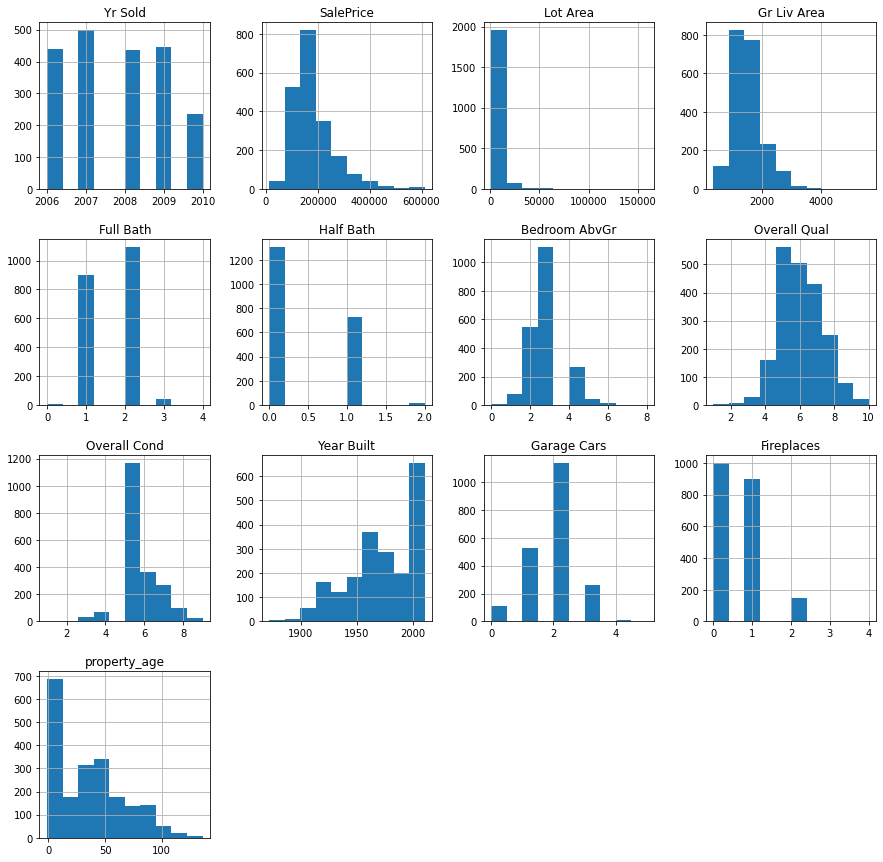

In [16]:
df.hist(figsize=(15,15));

The above histrogram shows a plot of all the numeric features in the dataframe (both discrete and continuous variables). Zooming in on continous variables, including the target variable point to the presence of outliers,and thus, normality issues which could comprise the quality of subsequent analysis. "Lot Area" measured in sq_ft is particularly glaring.

### Property Size Variables

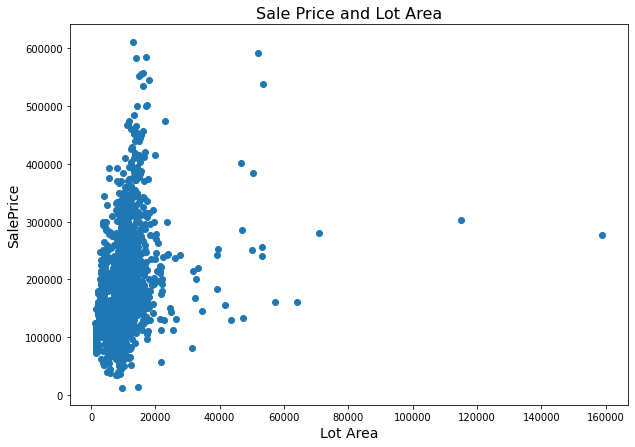

In [17]:
plt.figure(figsize=(10,7))
plt.scatter(x=df["Lot Area"], y=df["SalePrice"])
plt.xlabel("Lot Area", fontsize=14)
plt.ylabel("SalePrice",fontsize=14)
plt.title("Sale Price and Lot Area",fontsize=16);

This is further reinforced in the above scatter plot. Hence, I will be removing observations with a lot area greater than 37,000sq to reduce bias. 

In [18]:

df.drop(df[df["Lot Area"]>37000].index,inplace=True)

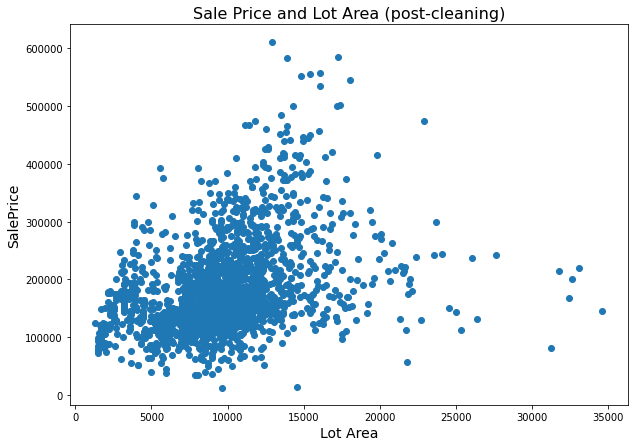

In [19]:
plt.figure(figsize=(10,7))
plt.scatter(x=df["Lot Area"], y=df["SalePrice"])
plt.xlabel("Lot Area", fontsize=14)
plt.ylabel("SalePrice",fontsize=14)
plt.title("Sale Price and Lot Area (post-cleaning)",fontsize=16);
plt.savefig("Sale Price & lot area")

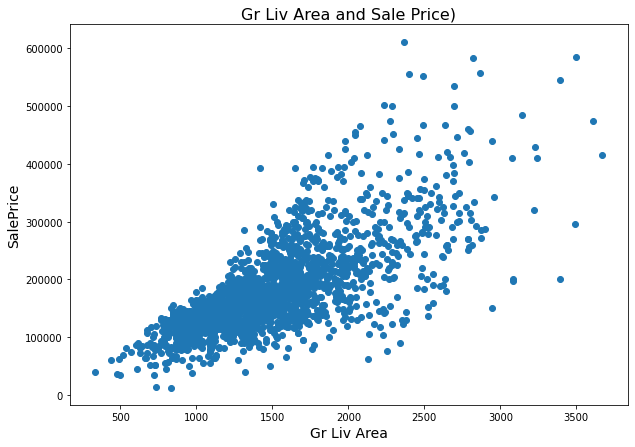

In [20]:
plt.figure(figsize=(10,7))
plt.scatter(x=df["Gr Liv Area"], y=df["SalePrice"])
plt.xlabel("Gr Liv Area", fontsize=14)
plt.ylabel("SalePrice",fontsize=14)
plt.title("Gr Liv Area and Sale Price)",fontsize=16);
plt.savefig("Gr liv area & sale price")

With the removal of extreme outliers, there is a visible improvement in the linear relationship of the variables, as can be seen in the plot above.

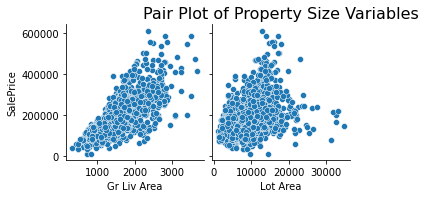

In [21]:
sns.pairplot(df, x_vars = ["Gr Liv Area","Lot Area"], y_vars = ["SalePrice"]);
plt.title ("Pair Plot of Property Size Variables", fontsize = 16)
plt.savefig("Pair Plot of Property Size Variables");

### Variables describing Number of Rooms

In [22]:
df["Full Bath"].value_counts()

2    1087
1     893
3      43
0       7
4       2
Name: Full Bath, dtype: int64

In [23]:
df["Half Bath"].value_counts()

0    1300
1     714
2      18
Name: Half Bath, dtype: int64

In [24]:
#There are two houses with 0 full & half baths. Essentially no bathrooms. Not possible
df[(df["Full Bath"]==0) & (df["Half Bath"]==0)]

,Yr Sold,Sale Type,SalePrice,Lot Area,Gr Liv Area,Neighborhood,Condition 1,Condition 2,Full Bath,Half Bath,Bedroom AbvGr,Overall Qual,Overall Cond,Year Built,Garage Cars,Lot Shape,Land Contour,Bldg Type,Fireplaces,Paved Drive,property_age
346,2006,WD,145000,10246,960,Sawyer,Norm,Norm,0,0,0,4,9,1965,1.0,IR1,Lvl,1Fam,0,Y,41
1518,2006,WD,35311,9000,480,IDOTRR,Norm,Norm,0,0,1,2,3,1949,1.0,Reg,Lvl,1Fam,0,Y,57


In [25]:
df["Bedroom AbvGr"].value_counts()

3    1103
2     537
4     261
1      74
5      40
6      12
0       4
8       1
Name: Bedroom AbvGr, dtype: int64

From the above, there are 7 listed properties that have 0 full baths, and 1,300 properties which recorded 0 half baths. Whle the "no half baths" scenario, is plausible, 0 full baths is highly unlikely. The same logic applies to the 4 scenarios where number of bedrooms was reported as 0. Hence, we will be replacing 0 full bath and bedroom values.

In [26]:
df['Full Bath'] = df['Full Bath'].replace(0, 1)

In [27]:
df['Bedroom AbvGr'] = df['Bedroom AbvGr'].replace(0, 1)

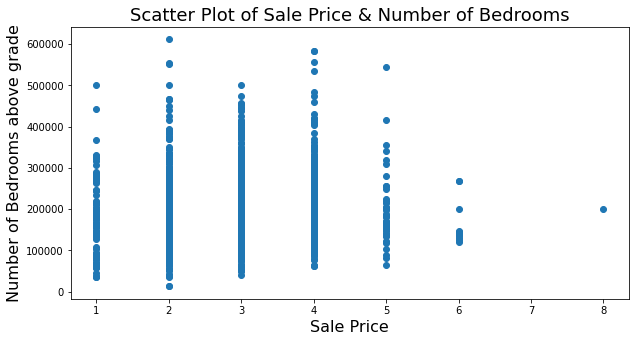

In [28]:
plt.figure(figsize=(10,5))
plt.scatter(x=df['Bedroom AbvGr'],y=df['SalePrice'])
plt.xlabel("Sale Price", fontsize = 16)
plt.ylabel("Number of Bedrooms above grade", fontsize=16)
plt.title("Scatter Plot of Sale Price & Number of Bedrooms", fontsize =18)
plt.savefig("Scatter Plot of Sale Price & Number of Bedrooms")

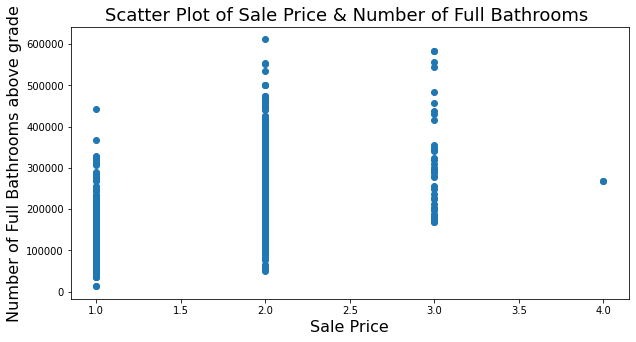

In [30]:
plt.figure(figsize=(10,5))
plt.scatter(x=df['Full Bath'],y=df['SalePrice'])
plt.xlabel("Sale Price", fontsize = 16)
plt.ylabel("Number of Full Bathrooms above grade", fontsize=16)
plt.title("Scatter Plot of Sale Price & Number of Full Bathrooms ", fontsize =18)
plt.savefig("Scatter Plot of Sale Price & Number of Full Bathrooms ");

In [37]:
# Creating an interaction term for number of bedrooms and full bathrooms
df["beds_and_baths"]= df['Full Bath']*df['Bedroom AbvGr'] 


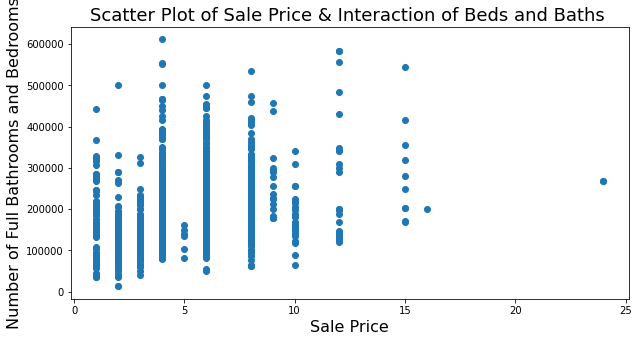

In [38]:
plt.figure(figsize=(10,5))

plt.scatter(x=df['beds_and_baths'],y=df['SalePrice'])
plt.xlabel("Sale Price", fontsize = 16)
plt.ylabel("Number of Full Bathrooms and Bedrooms", fontsize=16)
plt.title("Scatter Plot of Sale Price & Interaction of Beds and Baths ", fontsize =18)
plt.savefig("Scatter Plot of Sale Price & Interaction of Beds and Baths")

### Variables describing Property Aesthetics

In [39]:
df["Paved Drive"].value_counts()

Y    1845
N     148
P      39
Name: Paved Drive, dtype: int64

In [40]:
df["Lot Shape"].value_counts()

Reg    1294
IR1     680
IR2      50
IR3       8
Name: Lot Shape, dtype: int64

In [41]:
df["Land Contour"].value_counts()

Lvl    1837
HLS      84
Bnk      77
Low      34
Name: Land Contour, dtype: int64

In [42]:
df["Fireplaces"].value_counts()

0    998
1    894
2    134
3      5
4      1
Name: Fireplaces, dtype: int64

In [43]:
df["Garage Cars"].value_counts ()

2.0    1124
1.0     524
3.0     257
0.0     114
4.0      12
5.0       1
Name: Garage Cars, dtype: int64

In [44]:
df["Bldg Type"].value_counts()

1Fam      1682
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      45
Name: Bldg Type, dtype: int64

#### Preprocessing 

Pre processing of variables in this category will be involved binning "paved drive", "land contour","fireplaces", "lot shape", and "garage cars" as follows. Dummy variables will be generated for  "lot config" and "bldg type".

In [45]:
#defining func to "binarize paved drive"
def binarize_pd (pd):
    if pd == "Y":
        return 1
    else:
        return 0

In [46]:
#mapping function to column:
df["Paved Drive"]=df["Paved Drive"].map(binarize_pd)

In [47]:
df["Paved Drive"].value_counts()

1    1845
0     187
Name: Paved Drive, dtype: int64

In [48]:
#defining func to binarise lot shape
def binarize_s (shape):
    if shape == "Reg":
        return 1
    else:
        return 0

In [49]:
#mapping the function to column..
df["Lot Shape"]=df["Lot Shape"].map(binarize_s)

In [50]:
df["Lot Shape"].value_counts()

1    1294
0     738
Name: Lot Shape, dtype: int64

In [51]:
def binarize_l (land):
    if land == "Lvl":
        return 1
    else:
        return 0

In [52]:
#mapping function to column:
df["Land Contour"]=df["Land Contour"].map(binarize_l)

In [53]:
df["Land Contour"].value_counts()

1    1837
0     195
Name: Land Contour, dtype: int64

In [54]:
#defining function to bin fireplaces 
def bin_func (num):
    if num == 0:
        return 0
    else:
        return 1

In [55]:
#mapping function to column:
df["Fireplaces"]=df["Fireplaces"].map(bin_func)

In [56]:
df["Fireplaces"].value_counts()

1    1034
0     998
Name: Fireplaces, dtype: int64

In [57]:
#mapping same func to Garage cars column:
df["Garage"]=df["Garage Cars"].map(bin_func)

In [58]:
df["Garage"].value_counts()

1    1918
0     114
Name: Garage, dtype: int64

In [59]:
#function to generate dummy variables for "lot config" and "bldg type"
df= pd.get_dummies(df, columns=["Bldg Type"],drop_first=True)

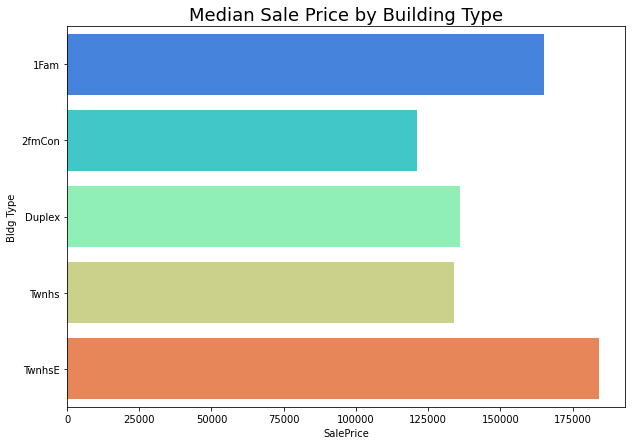

In [60]:
plt.figure(figsize=(10,7))
sns.barplot(x= train.groupby(["Bldg Type"])["SalePrice"].median(),orient ='h',
            y= train.groupby(["Bldg Type"])["SalePrice"].median().index, palette = "rainbow")
plt.title("Median Sale Price by Building Type",fontsize=18);
plt.savefig("Median Sale price by Building Type")

The above plot show the median sale price by building type. Surprsingly, end unit townhouses on average were more expensive than single family homes. 

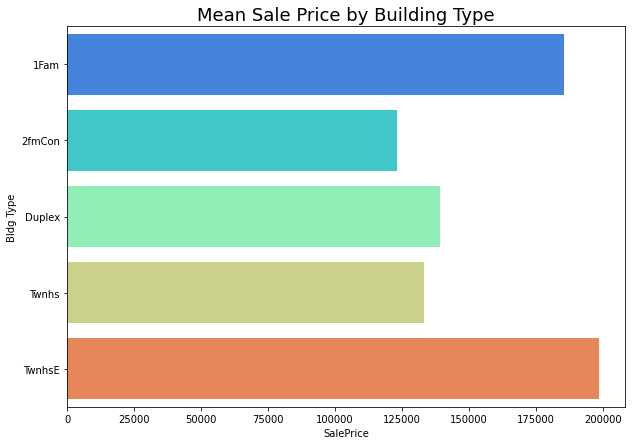

In [61]:
plt.figure(figsize=(10,7))
sns.barplot(x= train.groupby(["Bldg Type"])["SalePrice"].mean(),orient ='h',
            y= train.groupby(["Bldg Type"])["SalePrice"].mean().index, palette = "rainbow")
plt.title("Mean Sale Price by Building Type",fontsize=18);
plt.savefig("Mean Sale price by Building Type")

Grouping the variables by mean sale price, the trend was the same.

## Variables Describing Location Desirability

In [62]:
df["Condition 1"].value_counts()

Norm      1752
Feedr      107
Artery      69
RRAn        36
PosN        26
RRAe        21
PosA        12
RRNn         6
RRNe         3
Name: Condition 1, dtype: int64

I will create 3 columns by binarizing the "Condition 1" variable based on nearness/adjacence to a railroad, rterial or feeder street or positive offsite feature such as a park or greenbelt. 

In [63]:
df["near_railroad"]= ((df["Condition 1"]== "RRAn") | (df["Condition 1"]== "RRAe") | (df["Condition 1"]== "RRNn")| (df["Condition 1"]== "RRNe")).astype(int)

In [64]:
df["near_railroad"].value_counts()

0    1966
1      66
Name: near_railroad, dtype: int64

In [65]:
df["near_major_str"]= ((df["Condition 1"]== "Feedr") | (df["Condition 1"]== "Artery")).astype(int)

In [66]:
df["near_pos_feature"]= ((df["Condition 1"]== "PosN") | (df["Condition 1"]== "PosA")).astype(int)

### Variables describing quality of home / Construction Materials 

In [67]:
df["property_age"].value_counts()

1      153
0       79
2       62
4       57
6       53
5       46
3       44
31      43
7       37
9       36
32      32
8       32
13      31
51      31
39      30
30      30
44      29
52      29
11      29
42      28
10      27
49      27
43      27
12      26
53      25
41      25
50      24
47      24
48      23
34      23
36      22
37      22
54      22
46      22
45      21
55      21
40      20
38      20
68      20
33      19
15      19
87      19
35      19
17      18
69      18
59      17
81      17
14      16
56      16
70      16
82      16
19      15
84      15
29      14
57      14
58      13
88      13
89      13
61      13
28      13
67      12
83      12
86      12
16      12
78      12
26      12
60      11
18      11
22      11
71      10
62      10
93       9
94       9
80       9
77       9
97       8
98       8
106      8
90       8
65       8
99       7
21       7
20       6
76       6
96       6
66       6
92       6
25       6
85       6
74       6
23       6

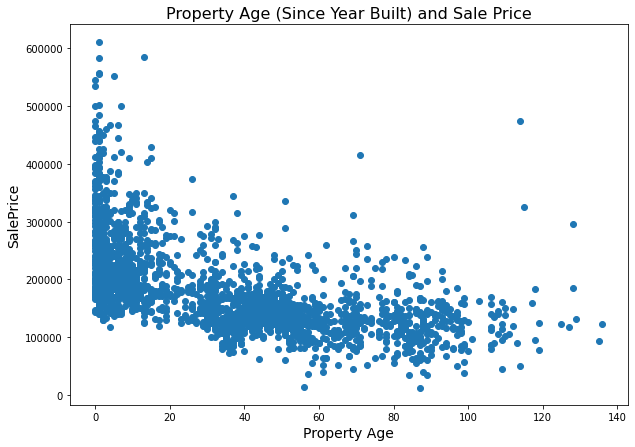

In [68]:
plt.figure (figsize=(10,7))

plt.scatter(x=df["property_age"],y=df["SalePrice"])

plt.xlabel("Property Age", fontsize=14)
plt.ylabel("SalePrice",fontsize=14)
plt.title("Property Age (Since Year Built) and Sale Price", fontsize=16);
plt.savefig("Property Age (Since Year Built) and Sale Price")

A strong linear relationship can be observed between property age and sale price. The relationship is negative in nature, where in sale price decreases, the property age increases.

In [69]:
df["Overall Qual"].value_counts()

5     560
6     501
7     428
8     248
4     158
9      75
3      28
10     21
2       9
1       4
Name: Overall Qual, dtype: int64

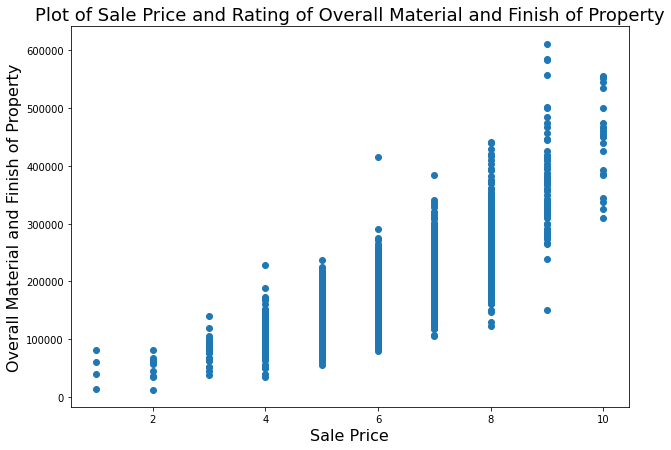

In [70]:
plt.figure(figsize=(10,7))
plt.scatter(x=df["Overall Qual"],y=df["SalePrice"])
plt.xlabel("Sale Price", fontsize = 16)
plt.ylabel("Overall Material and Finish of Property", fontsize= 16)
plt.title("Plot of Sale Price and Rating of Overall Material and Finish of Property", fontsize= 18)
plt.savefig("Plot of Sale Price and Rating Overall Material and Finish of Property")

A clear linear relationship can be observed between sale price and the ordinal measure of the overall quality of the material and finish of the property. Here, quality is measured on a scale of 1 to 10, where 1 denotes "very poor" and 10 denotes "excellent".

In [71]:
df["Overall Cond"].value_counts()

5    1155
6     366
7     266
8     101
4      70
3      35
9      29
2       6
1       4
Name: Overall Cond, dtype: int64

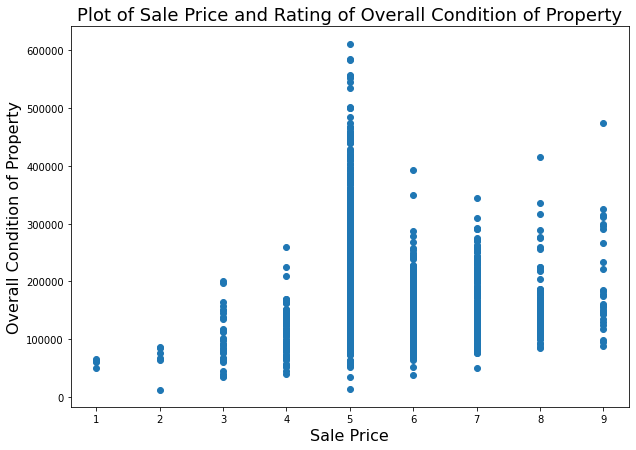

In [72]:
plt.figure(figsize=(10,7))

plt.scatter(x=df["Overall Cond"],y=df["SalePrice"])
plt.xlabel("Sale Price", fontsize = 16)
plt.ylabel("Overall Condition of Property", fontsize= 16)
plt.title("Plot of Sale Price and Rating of Overall Condition of Property", fontsize= 18)
plt.savefig("Plot of Sale Price and Rating of Overall Condition of Property")

The relationship  between sale price and the ordinal measure of the overall condition of the property can also be described as linear (although the linear relationship is not so strong). Like in the plot above, quality is measured on a scale of 1 to 10, where 1 denotes "very poor" and 10 denotes "excellent".

#### Preprocessing

To strengthen the linear relationships observed in the quality indicators above, I will be interacting the variables "Overall Qual" and "Overall Cond".

In [73]:
#Creating an interaction term overall quality and overal condition:
df["overall_qual_and_cond"]= df["Overall Qual"] * df["Overall Cond"]

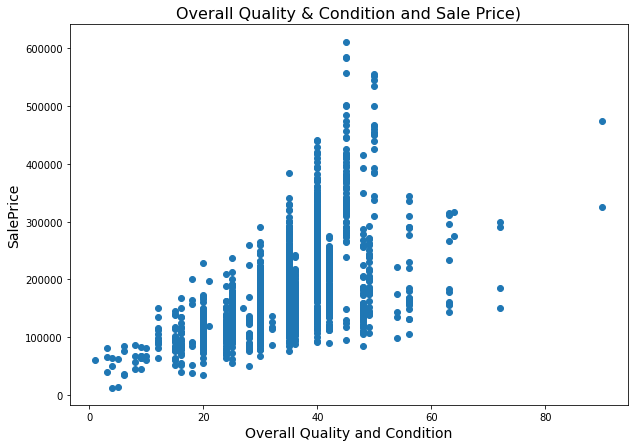

In [74]:
plt.figure (figsize=(10,7))
plt.scatter(x=df["overall_qual_and_cond"],y=df["SalePrice"])
plt.xlabel("Overall Quality and Condition", fontsize=14)
plt.ylabel("SalePrice",fontsize=14)
plt.title("Overall Quality & Condition and Sale Price)",fontsize=16);
plt.savefig("Overall Quality_Condition and Sale Price")

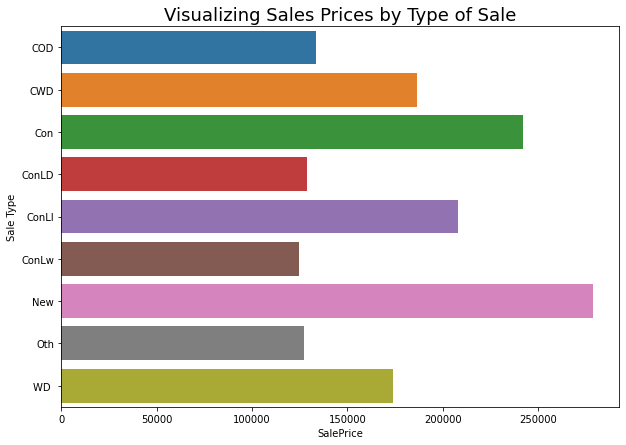

In [75]:
plt.figure(figsize=(10,7))
sns.barplot(x= df.groupby(["Sale Type"])["SalePrice"].mean(), 
            y= df.groupby(["Sale Type"])["SalePrice"].mean().index, orient= 'h' )
plt.title("Visualizing Sales Prices by Type of Sale",fontsize=18);
plt.savefig("sale price by type of sale")

## OLS Regression Model

### OLS Regression Using Train Test Split on the Training Dataset

In [76]:
df.head()

,Yr Sold,Sale Type,SalePrice,Lot Area,Gr Liv Area,Neighborhood,Condition 1,Condition 2,Full Bath,Half Bath,Bedroom AbvGr,Overall Qual,Overall Cond,Year Built,Garage Cars,Lot Shape,Land Contour,Fireplaces,Paved Drive,property_age,beds_and_baths,Garage,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,near_railroad,near_major_str,near_pos_feature,overall_qual_and_cond
0,2010,WD,130500,13517,1479,Sawyer,RRAe,Norm,2,1,3,6,8,1976,2.0,0,1,0,1,34,6,1,0,0,0,0,1,0,0,48
1,2009,WD,220000,11492,2122,SawyerW,Norm,Norm,2,1,4,7,5,1996,2.0,0,1,1,1,13,8,1,0,0,0,0,0,0,0,35
2,2010,WD,109000,7922,1057,NAmes,Norm,Norm,1,0,3,5,7,1953,1.0,1,1,0,1,57,3,1,0,0,0,0,0,0,0,35
3,2010,WD,174000,9802,1444,Timber,Norm,Norm,2,1,3,5,5,2006,2.0,1,1,0,1,4,6,1,0,0,0,0,0,0,0,25
4,2010,WD,138500,14235,1445,SawyerW,Norm,Norm,2,0,3,6,8,1900,2.0,0,1,0,0,110,6,1,0,0,0,0,0,0,0,48


In [77]:
#Specifiying X variables:
X= df.drop(columns=["Yr Sold", "Sale Type","SalePrice", "Neighborhood","Condition 1","Condition 2","Half Bath",
                    "beds_and_baths","Overall Qual","Overall Cond","Year Built","Garage Cars"])

In [78]:
#Specifying target variable:
y= df["SalePrice"]

In [79]:
#Dataframe containing target variable and features:
target_and_features= df.drop(columns=["Yr Sold", "Sale Type", "Neighborhood","Condition 1","Condition 2","Half Bath",
                    "beds_and_baths","Overall Qual","Overall Cond","Year Built","Garage Cars"])

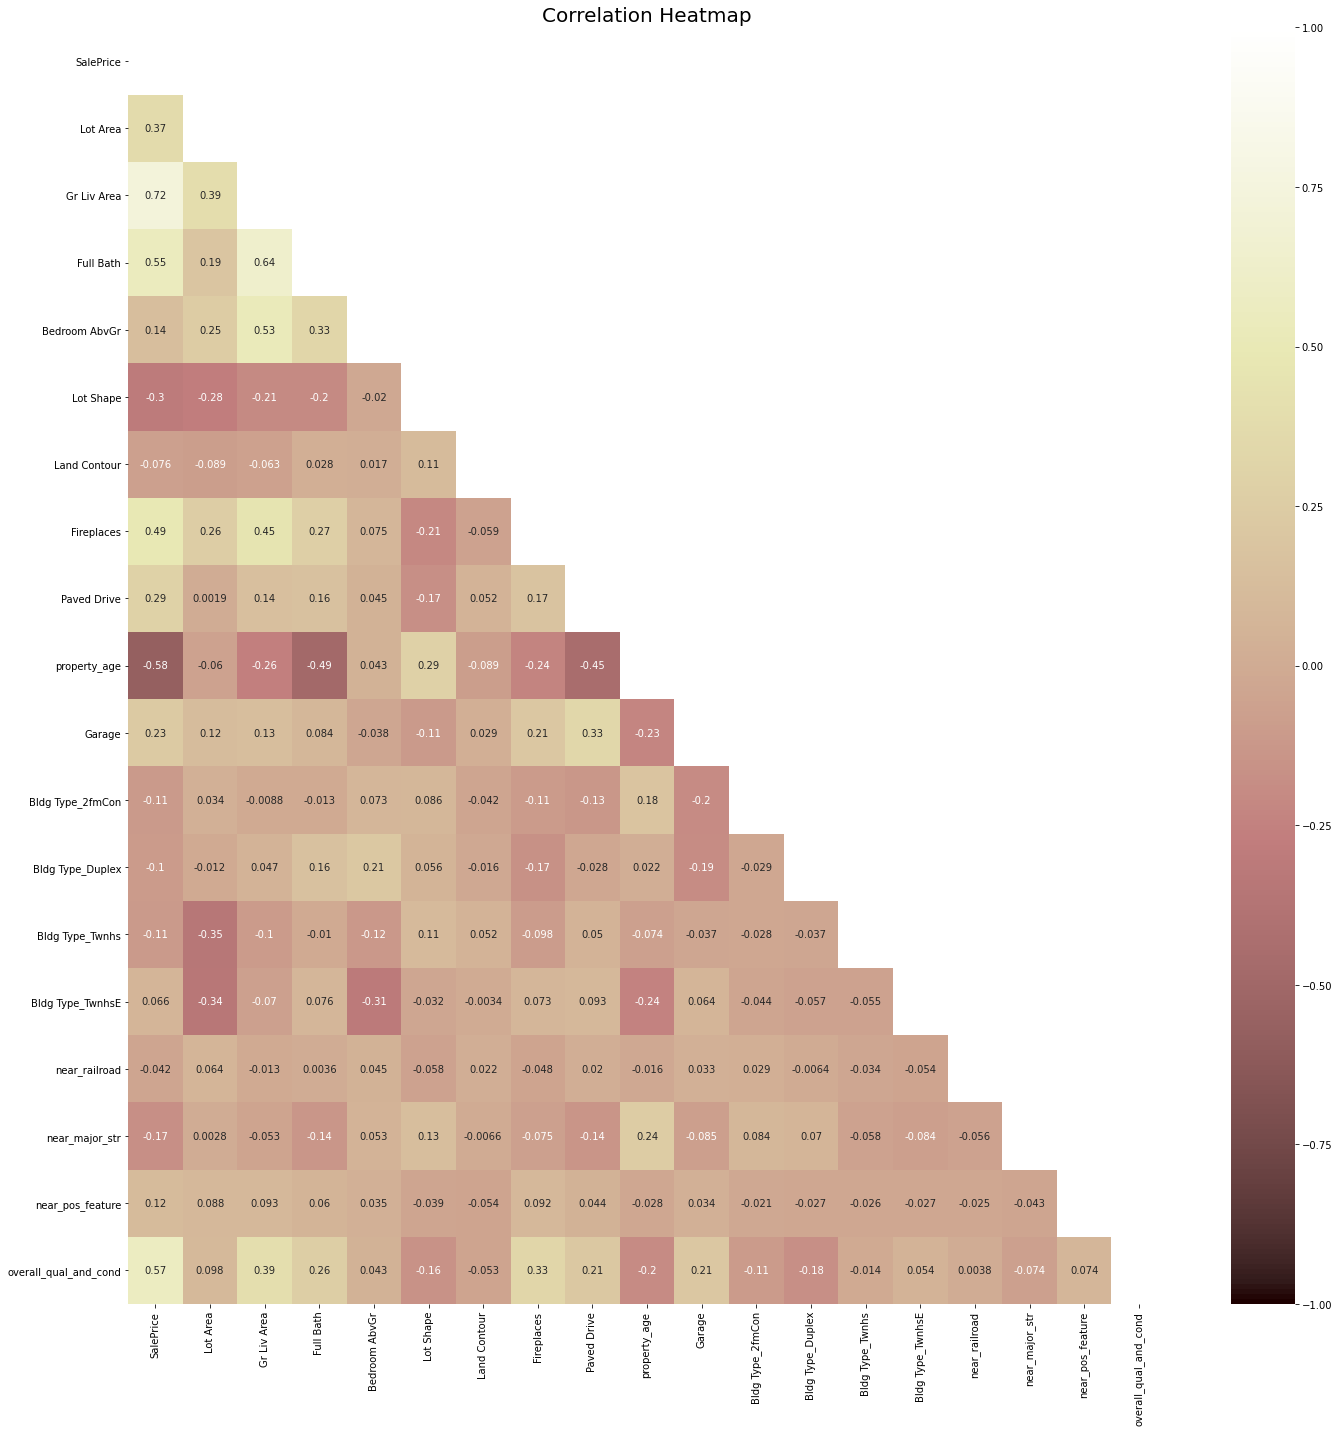

In [80]:
plt.figure(figsize = (20,20))

corr = target_and_features.corr()
corr

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(data = corr,
           annot = True,
           vmin = -1,
           vmax = 1,
           mask = mask,
           cmap = 'pink');
plt.title("Correlation Heatmap", fontsize=20)
plt.savefig("correlation matrix")
plt.tight_layout()

Assessing correlations among the variables included in the model, was key to ensure that the assumption of "low or no multicollinearity" in a multiple linear regression was met. From the above heatmap, correlations among variables was generally low to moderate. The highest correlation observed between X features was 0.64, between the variables "full bath" and "Gr Liv Area". This is, however, acceptable, and the variables can be retained in the model. 

In [81]:
#Applying train test split to model:
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 42)

In [82]:
#initiating linear regression
lr= LinearRegression()

In [83]:
#fitting the model
lr.fit(X_train,y_train)

LinearRegression()

In [84]:
#evaluating model
lr.score(X_train, y_train),lr.score(X_test, y_test)

(0.8144418828444824, 0.7941339863895593)

The R2 scores above show that the model specified is a low bias and low variance model. Low bias, because R2 scores in both the train and test sets are quite high. And low variance, because the R2 scores for both sets are close in value. 

In [85]:
#predicting values for y:
y_preds= lr.predict(X_test)

In [86]:
#computing magnitude of residuals:
resids= y_test-y_preds

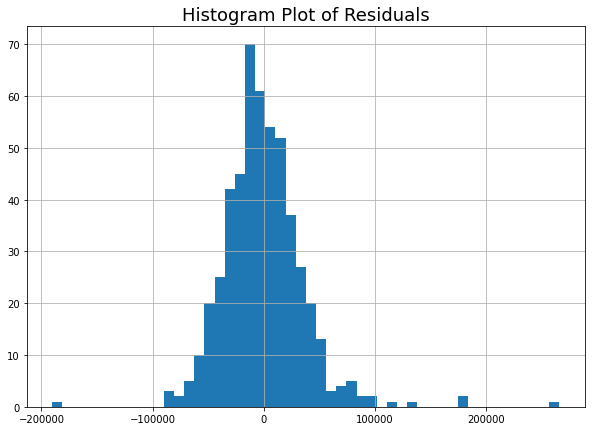

In [87]:
plt.figure(figsize=(10,7))
resids.hist(bins=50);
plt.title("Histogram Plot of Residuals", fontsize=18)
plt.savefig("Histogram Plot of Residuals")

From the above plot, we can see that the residuals follow a normal distribution. Thus, the OLS assumption of normality of residuals distribution has been met.

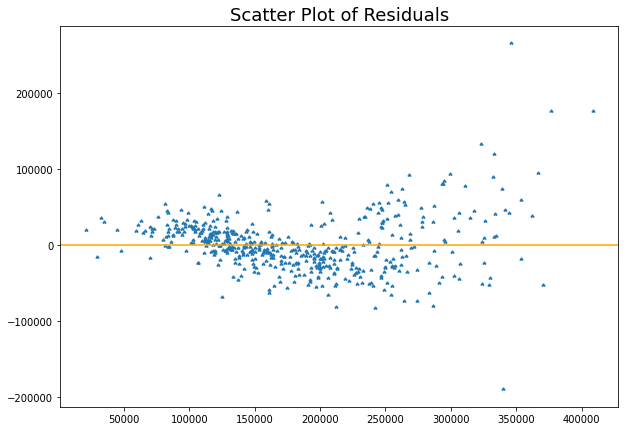

In [88]:
plt.figure(figsize=(10,7))
plt.scatter(y_preds, resids, s=10,marker = 10 )
plt.axhline(0, color="orange");
plt.title("Scatter Plot of Residuals", fontsize=18)
plt.savefig("Scatter plot of residuals")

From the above plot, we can see that the OLS assumption of "equality of variance" was met.

/Users/nnenna/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


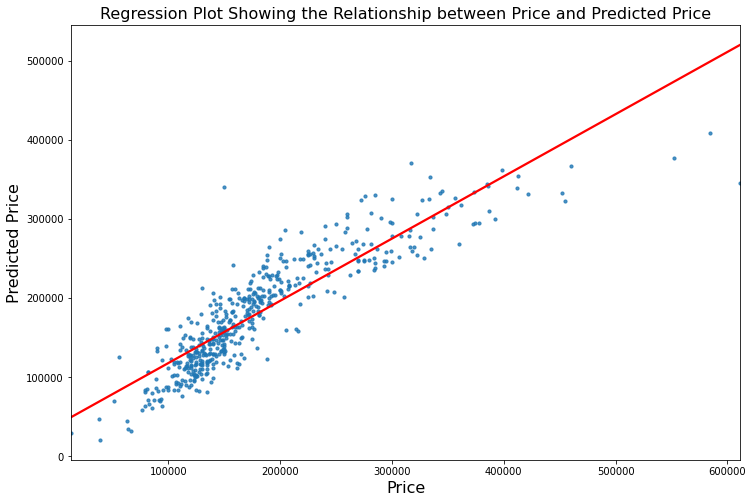

In [89]:
plt.figure(figsize=(12,8))
sns.regplot(y_test, y_preds, ci=None, 
            scatter_kws = {'s': 10}, 
            line_kws = {'color': 'red'})
plt.xlabel("Price", fontsize=16)
plt.ylabel("Predicted Price", fontsize=16)
plt.title("Regression Plot Showing the Relationship between Price and Predicted Price", fontsize=16)
plt.savefig("Regression plot of predicated values");

From the above plot, we can see that the predictive power of the model is quite strong, especially at low to moderate sale price points. However, at relatively higher price points, the predictive power can be seen to weaken.

In [90]:
#defining function to compute metrices to evaluate model performance:
def reg_metrics(y,y_preds):
    return {"MAE": round(metrics.mean_absolute_error(y, y_preds),2), 
            "SSE": round(np.sum((y-y_preds)**2),2),
            "MSE": round(metrics.mean_squared_error(y,y_preds),2),
            "RMSE":round((metrics.mean_squared_error(y,y_preds))**0.5,2),
            "R2": round(metrics.r2_score (y, y_preds),2)}

In [91]:
reg_metrics(y_test,y_preds)

{'MAE': 25947.47,
 'SSE': 676673943875.3,
 'MSE': 1332035322.59,
 'RMSE': 36497.06,
 'R2': 0.79}

Although the R2 scores for the model are quite good, the metrices regarding the sum of squared errors did not fare as well. In particular, the Root Mean Squared Error (RMSE) was quite high, indicating that the predictive power of the model is generally not very strong. However, because the objective of the analysis is inference, the good r2 scores are sufficient to proceed.

In [92]:
#Obtaining values for the model coefficients:
lr.coef_

array([ 2.40107740e+00,  9.48529032e+01, -6.15773869e+03, -1.85230807e+04,
        3.83372067e+03, -7.29376503e+03,  4.60340828e+03, -4.10732926e+03,
       -1.01713661e+03, -4.45772894e+03, -3.50777240e+02, -7.63517657e+03,
       -2.55822861e+04, -5.83049495e+03, -1.73985636e+04, -6.18358725e+03,
        5.66964409e+03,  2.19888512e+03])

In [93]:
#Creating list of Coefficients, with corresponding column name:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
coefficients
#Credit: https://stackoverflow.com/questions/26951880/scikit-learn-linear-regression-how-to-get-coefficients-respective-features

,0,0
0,Lot Area,2.401077
1,Gr Liv Area,94.852903
2,Full Bath,-6157.738694
3,Bedroom AbvGr,-18523.080700
4,Lot Shape,3833.720665
5,Land Contour,-7293.765027
6,Fireplaces,4603.408276
7,Paved Drive,-4107.329263
8,property_age,-1017.136612
9,Garage,-4457.728944


In [94]:
#Saving coefficients list to excel file:
coefficients.to_excel("datasets/coefficient.xlsx")

## Regularized Models

Regularized models are employed to help tackle the issue of high variance in models. This was not the case in this analysis as the OLS model specified above was low variance. However, as per the requirements of this project, I specified Ridge and Lasso regression models as follows:

### Ridge Regression

In [95]:
from sklearn.linear_model import Ridge, RidgeCV

In [96]:
#scaling data
ss = StandardScaler ()

Z_train = ss.fit_transform (X_train)
Z_test = ss.transform(X_test)


In [97]:
# Setting up a list of ridge alphas to check:
r_alphas = np.logspace(0,5,100)

# Cross-validating over list of ridge alphas:
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

# Fitting model using best ridge alpha:
ridge_cv.fit(Z_train, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, scoring='r2')

In [98]:
#Printing optimized alpha:
ridge_cv.alpha_

6.42807311728432

In [99]:
#evaluating model using R2 scores:
ridge_cv.score(Z_train, y_train), ridge_cv.score(Z_test, y_test) 

(0.8144129704565586, 0.7945706269574592)

R2 scores for both the training and test sets remained the same as with the OLS model.

In [100]:
#generating predictions for the y variable:
y_preds_ridge = ridge_cv.predict(Z_test)

In [101]:
#computing magnitude of residuals:
ridge_resids = y_test - y_preds_ridge

In [102]:
#printing ridge model coefficients:
ridge_cv.coef_

array([  9597.86833221,  44823.91304943,  -2986.44409621, -15126.45739541,
         1777.33515898,  -2113.42903618,   2449.26959377,  -1115.4746087 ,
       -30832.48113644,   -993.18717637,    -92.7570256 ,  -1458.51473407,
        -4714.2437595 ,  -1489.40890928,  -3069.32336295,  -1724.24937368,
          762.98893529,  20340.61306082])

In [103]:
#generating list of coeefficients with corresponding column names:
coefficients_ridge = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(ridge_cv.coef_))], axis = 1)
coefficients_ridge

,0,0
0,Lot Area,9597.868332
1,Gr Liv Area,44823.913049
2,Full Bath,-2986.444096
3,Bedroom AbvGr,-15126.457395
4,Lot Shape,1777.335159
5,Land Contour,-2113.429036
6,Fireplaces,2449.269594
7,Paved Drive,-1115.474609
8,property_age,-30832.481136
9,Garage,-993.187176


In [104]:
reg_metrics(y_test,y_preds_ridge)

{'MAE': 25874.73,
 'SSE': 675238722539.08,
 'MSE': 1329210083.74,
 'RMSE': 36458.33,
 'R2': 0.79}

Model evaluation metrics for the ridge model were similar to that of the OLS model.

### Lasso Regression

In [105]:
from sklearn.linear_model import Lasso, LassoCV

In [106]:
# Setting up a list of Lasso alphas to check:
l_alphas = np.logspace(-3, 0, 100)

# Cross-validating over list of Lasso alphas:
lasso_cv = LassoCV(alphas = l_alphas, cv=5, max_iter = 50000 )

# Fitting model using best ridge alpha:
lasso_cv.fit(Z_train, y_train);


In [107]:
#printing "best" lasso alpha:
lasso_cv.alpha_

1.0

In [108]:
#evaluating lasso model with r2 scores:
lasso_cv.score(Z_train, y_train), lasso_cv.score(Z_test, y_test)

(0.8144418780818035, 0.7941335833690469)

R2 scores in both the train and test sets in the LassoCV model were the same as those generated for the OLS and ridge models.

In [109]:
#predicting y variable:
y_preds_lasso = lasso_cv.predict(Z_test)

In [110]:
#computing magnitude of residuals:
lasso_resids = y_test - y_preds_lasso

In [111]:
#evaluating model:
reg_metrics(y_test,y_preds_lasso)

{'MAE': 25947.11,
 'SSE': 676675268588.76,
 'MSE': 1332037930.29,
 'RMSE': 36497.09,
 'R2': 0.79}

Metrics were the same as in the OLS and ridge models:

In [112]:
#printing model coefficients:
lasso_cv.coef_

array([  9532.10346198,  45423.86665195,  -3346.26631288, -15403.44461824,
         1833.20917783,  -2105.71038476,   2301.21254072,  -1203.33529713,
       -31117.02230297,  -1026.90635729,    -54.4675264 ,  -1410.98724838,
        -4769.82178962,  -1574.25931744,  -3068.35454812,  -1708.08675081,
          773.72604953,  20353.07178651])

In [113]:
#creating list of model coefficients with corresponding column names:
coefficients_lasso = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lasso_cv.coef_))], axis = 1)

## Interpretation of Regression Results

In [114]:
results_coef= pd.concat([coefficients, coefficients_ridge, coefficients_lasso], axis=1)
results_coef.columns = ["feature", "OLS_coef", "feature1", "ridge_coef","feature2", "lasso_coef"]
results_coef.drop(columns=["feature1", "feature2"],inplace=True)
results_coef

,feature,OLS_coef,ridge_coef,lasso_coef
0,Lot Area,2.401077,9597.868332,9532.103462
1,Gr Liv Area,94.852903,44823.913049,45423.866652
2,Full Bath,-6157.738694,-2986.444096,-3346.266313
3,Bedroom AbvGr,-18523.080700,-15126.457395,-15403.444618
4,Lot Shape,3833.720665,1777.335159,1833.209178
5,Land Contour,-7293.765027,-2113.429036,-2105.710385
6,Fireplaces,4603.408276,2449.269594,2301.212541
7,Paved Drive,-4107.329263,-1115.474609,-1203.335297
8,property_age,-1017.136612,-30832.481136,-31117.022303
9,Garage,-4457.728944,-993.187176,-1026.906357


The above table presents regression results from the OLS, ridge CV and lassoCV models. Generally, results in terms of coefficient maginitude and signage, as well as evaluation metrics were uniform across all 3 models. I will be interpreting coefficient results for our primary model- the OLS model:

It can be inferred from the model that, all other factors held constant:
* a sq_ft increase in lot area, will increase the sale price of a home by USD 2.4;
* a sq_ft increase in the general living area will increase sale price by USD 94.9;
* A regular shaped lot, relative to an irregular shaped lot will add USD 3,833 to sale price;
* Property constructed on a flat/near level land will be USD 7,293 cheaper than one constructed on relatively slopy land;
* A home with at least 1 fireplace will be USD 4,603 more expensive than one that has no fireplace;
* Having a paved driveway, it appears, decreases property value by USD 4,107;
* A one year increase in a property's age, will decrease its value by USD 1,017;
* Having a garage decreases property value by USD 4,457;
* A 2-family conversion building type is USD 350.7 cheaper than a single family detached home;
* A duplex is USD 7,635 cheaper than a single family detached family home;
* A town house (inside unit) is USD 25,582 cheaper than a single family detached home;
* A town house (end unit) is USD 5,380 cheaper than a single family detached home
* A house located near a rail road is USD 17,398 cheaper than one that is not;
* A house located near or adjacent to a feeder, and/or arterial street is USD 6,183 cheaper than 1 that is not;
* A house located near a postive feature such as a park, or a greenbelt, is USD 5,669 more expensive than one that isn't; and
* As the overall quality of construction materials, finishing and the general condition of the home increases along an ordinal scale (1-10), each unit increase adds USD 2,198 to the value of a home.

I am unable to interprete coefficients for "full bath" and "BedroomAbvGr". The coefficients are very large and negatively signed which doesn't make sense intuitively. My processes are fully described in this notebook and I look forward to learning about any errors I made that could have caused this discrepancy.

## Conclusion

This analysis was focused on assessing the key determinants of property prices in Ames City, Iowa. In doing so, the study categorized features affecting property sales price into 5 broad groups, as informed by literature on the subject (Tan, 2019). These categories were property size, location desirability, number of bedrooms and bathrooms, quality and condition of home, and variables describing "aesthetics" or added features. 

To meet the study objectives, OLS, Ridge CV and LassoCV models were specified. Overall, the model was low bias and low variance with R2 scores on the train and test datasets at 81% and 79%, respectively across all 3 models. This means that 81% and 79% of the variation in sales price can be explained by the "X"features in the train and test models, respectively.

The aim of the exercise was to obtain relevant information, particularly aimed at first-time home buyers/home owners in order to help them make data driven decisions, to optimize value for money, pre and post purchase of a home. 

In summary, the regression results suggest that:

> 1. Property size is the most important factor that influences sale price. For Ames City, the size of living area (above grade) is valued over lot size.
> 2. The quality and condition of a home are fundamental too, and the most important indicator to look out for, is the age of a property.
> 3. Location matters, and it appears negative features have a greater effect on sale price, than positive features do.
> 4. A fireplace is a very important feature that affects sale price. The shape of the lot, and land contour are key as well. 
> 5. End unit town houses cost a lot more than inside unit town houses. 
> 6. For further study, analyzing features by neighbourhood will interesting to generate inferences that can be generalized for other contexts.

## Recommendations

> 1. Prospective home buyers should pay close attention to understand property location variables. What is the property close to? How busy is the street?

> 2. Details such as land contour, whether or not a fireplace is present, are important details to look out for.

> 3. Property size matters, and in Ames, inside space is valued over outside space.

> 4. Spending on a paved driveway and/or a garage may not be profitable.


## Kaggle Submission

In this section, I will be using the OLS model specified above to genate predictions of sale price for test.csv.

In [115]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [116]:
#checking for null values:
test.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       160
Lot Area             0
Street               0
Alley              820
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type         1
Mas Vnr Area         1
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           25
Bsmt Cond           25
Bsmt Exposure       25
BsmtFin Type 1      25
BsmtFin SF 1         0
BsmtFin Type 2      25
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
Heating              0
Heating QC           0
Central Air          0
Electrical 

In [117]:
#dropping all columns which contain null values except "Garage Cars", "Garage Area", "Total Bsmt SF"

test = test.loc[:,(-test.isnull().any()) | (test.columns.isin(['Garage Cars', 'Garage Area', 'Total Bsmt SF', "Lot Frontage"]))]

#Credit: https://stackoverflow.com/questions/61301549/pandas-drop-all-columns-with-missing-values-except-1-column

In [118]:
#checking dimensions of data:
test.shape

(878, 62)

In [119]:
df_test= test[["Yr Sold","Sale Type","Lot Area", "Gr Liv Area","Neighborhood", "Condition 1","Condition 2",
               "Full Bath","Bedroom AbvGr","Overall Qual","Overall Cond", "Year Built", "Garage Cars","Lot Shape", 
               "Land Contour","Bldg Type","Fireplaces", "Paved Drive" ]]

In [120]:
df_test["property_age"]= df_test["Yr Sold"]- df_test["Year Built"]

In [121]:
df_test["Paved Drive"]=df_test["Paved Drive"].map(binarize_pd)

In [122]:
#mapping the function to column..
df_test["Lot Shape"]=df_test["Lot Shape"].map(binarize_s)

In [123]:
#mapping function to column:
df_test["Land Contour"]=df_test["Land Contour"].map(binarize_l)

In [124]:
#mapping function to column:
df_test["Fireplaces"]=df_test["Fireplaces"].map(bin_func)

In [125]:
#mapping same func to Garage cars column:
df_test["Garage"]=df_test["Garage Cars"].map(bin_func)

In [126]:
#function to generate dummy variables for "bldg type"
df_test= pd.get_dummies(df_test, columns=["Bldg Type"],drop_first=True)

In [127]:
df_test["near_railroad"]= ((df_test["Condition 1"]== "RRAn") | (df_test["Condition 1"]== "RRAe") | (df_test["Condition 1"]== "RRNn")| (df_test["Condition 1"]== "RRNe")).astype(int)

In [128]:
df_test["near_major_str"]= ((df_test["Condition 1"]== "Feedr") | (df_test["Condition 1"]== "Artery")).astype(int)

In [129]:
df_test["near_pos_feature"]= ((df_test["Condition 1"]== "PosN") | (df_test["Condition 1"]== "PosA")).astype(int)

In [130]:
#Creating an interaction term overall quality and overal condition:
df_test["overall_qual_and_cond"]= df_test["Overall Qual"] * df_test["Overall Cond"]

In [131]:
#specifying X variables:
X_true= df_test.drop(columns=["Yr Sold", "Sale Type", "Neighborhood","Condition 1","Condition 2","Overall Qual","Overall Cond","Year Built","Garage Cars"])

In [132]:
#ensuring alignment of columns with OLS model:
X_true.shape, X_train.shape

((878, 18), (1524, 18))

In [133]:
#generating predictions:
final_preds= lr.predict(X_true)

In [134]:
#imputing "Sale Price" column containing predictions into test.csv
test["SalePrice"]= final_preds

In [135]:
kaggle= test[["Id","SalePrice"]]

In [136]:
#saving dataframe to csv:
kaggle.to_csv("datasets/kaggle_submission.csv", index = False)

In [137]:
kaggle.shape

(878, 2)

In [138]:
kaggle

,Id,SalePrice
0,2658,167296.194636
1,2718,130659.106477
2,2414,234140.272527
3,1989,95031.651277
4,625,154582.512801
...,...,...
873,1662,208033.480963
874,1234,232946.776575
875,1373,126981.612268
876,1672,99318.303220


In [139]:
pd.read_csv("datasets/sample_sub_reg.csv")

,Id,SalePrice
0,2,181479.1217
1,4,181479.1217
2,6,181479.1217
3,7,181479.1217
4,17,181479.1217
...,...,...
873,2919,181479.1217
874,2921,181479.1217
875,2922,181479.1217
876,2925,181479.1217


In [140]:
kaggle_preds2 = {'Id':test['Id'], 'SalePrice':final_preds}

In [141]:
kaggle_preds2 = pd.DataFrame(kaggle_preds2)

In [142]:
kaggle_preds2.to_csv("datasets/kaggle_preds2.csv", index= False)

In [143]:
kaggle_preds2

,Id,SalePrice
0,2658,167296.194636
1,2718,130659.106477
2,2414,234140.272527
3,1989,95031.651277
4,625,154582.512801
...,...,...
873,1662,208033.480963
874,1234,232946.776575
875,1373,126981.612268
876,1672,99318.303220


## Polynomial Features

In [144]:
poly = PolynomialFeatures(include_bias = False)

In [145]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [146]:
lr.fit(X_train_poly, y_train)

LinearRegression()

In [147]:
lr.score(X_train_poly, y_train), lr.score(X_test_poly, y_test)

(0.8951193107573866, 0.8617402725220413)

In [148]:
X_train_poly.shape

(1524, 189)

In [149]:
X_test_poly.shape

(508, 189)

In [150]:
X_true.shape

(878, 18)

In [151]:
X_true_poly = poly.transform(X_true)

In [152]:
poly_preds= lr.predict(X_true_poly)

In [153]:
lr.predict(X_true_poly)

array([  157826.76909733,   144258.921875  ,   234652.90486703,
          99390.64374497,   152343.65383457,    96992.10823576,
         115401.65002607,   155193.61509354,   210831.00460319,
         159701.74234981,   150830.36559373,   122282.57564189,
         154976.75155523,   283131.17708085,   174286.49146541,
         133466.33110157,   149958.15634607,   118119.47551979,
         207331.3419796 ,   206437.38662426,   148410.16117518,
         118531.21607562,   213182.02045536,   154269.47444376,
         198969.3656386 ,   131286.57237824,   136386.79653139,
         117997.58771918,   135554.19555631,    58403.72824544,
         121066.42380397,   101442.15710839,   233762.36045906,
         143002.62112921,   210460.61668015,   202909.9716199 ,
         106891.76548785,   123654.06146359,   125195.89743341,
         173690.78573428,   160776.70168043,   216071.63664707,
         129818.59610313,   173143.19767427,   206017.65270645,
          93504.58256274,   232665.72271

In [154]:
kaggle_preds3 = {'Id':test['Id'], 'SalePrice':poly_preds}

In [155]:
kaggle_preds3 = pd.DataFrame(kaggle_preds3)

In [156]:
kaggle_preds3.to_csv("datasets/kaggle_preds3.csv", index= False)